# Práctica 1: Análisis exploratorio de datos, preprocesamiento y validación de modelos de clasificación

## Minería de Datos

### Curso académico 2022-2023

#### Grupo D:

* Miguel Paños González
* David Ruiz Núñez


## Estudio de los datos

Para comenzar, vamos a realizar un estudio previo de los datos para posetriormente hacer el procesamiento de los mismos.

# 1. Preliminares

Antes de comenzar, vamos a fijar una semilla para que los experimentos sean reproducibles:

In [364]:
seed = 1 #semilla que usaremos para que los resultados no varíen

In [365]:
from sklearn.utils import all_estimators

In [366]:
filter = None

In [367]:
estimators = all_estimators(filter)

In [368]:
estimators = dict(estimators)

# 2. Acceso y almacenamiento de datos

Se trata de uno de los problemas críticos en cualquier aplicación real, ya que tendremos que tener en cuenta numerosas preguntas:

* ¿Dónde se generan los datos?
* ¿Con qué frecuencia?
* ¿Cuánto cuesta transmitirlos?
* ¿Dónde se van a almacenar?
* ¿Cuánto ocupan?

---

**Palabras clave**:

* Las filas se denominan **instancias**, **casos** o **ejemplos**.
* Las columnas son **variables** de nuestro problema.

---

El conjunto de datos que vamos a emplear es `train`. Este lo hemos extraido de la plataforma Kaggle. Se trata de un conjunto de datos acerca del Titanic, este contiene 891 muestras tomadas en función de si ha sobrevivido una persona o no, teniendo survived a 0 o 1:

* `No ha sobrevivió` = 0
* `Sobrevivió` = 1

Que conforman los valores de la variable a predecir, esto es, `Survived`. Para cada una de las muestras se han obtenido una serie de mediciones correspondientes a las variables predictoras del problema:

* `PClass`: Clase en la que viaja el pasajero, 1 = primera, 2 = segunda, 3 = tercera
* `Name`: Nombre del pasajero
* `Sex`: Sexo del pasajero, male = hombre, female = mujer
* `Age`: Edad del pasajero, en años
* `SibSp`: Número de hermanas / esposas a bordo del Titanic
* `Parch`: Número de padres / hijos a bordo del Titanic
* `Ticket`: Número de Ticket
* `Fare`: Coste del viaje
* `Cabin`: Número de cabina
* `Embarked`: Puerto de embarque, C = Cherbourg, Q = Queenstown, S = Southampton

El objetivo sería clasificar una nueva instancia, cuya supervivencia es desconocida, en función de sus propiedades.

---

**Palabras clave:**

* La variable del conjunto de datos a predecir se denomina **variable objetivo**. En problemas de clasificación se conoce también como **variable clase**.

* El conjunto de **características** o **variables predictoras** es el conjunto de datos sin la variable objetivo, esto es, únicamente con las variables que se utilizan para predecirla.

---

Comenzaremos cargando el conjunto de datos del **Titanic**

In [369]:
import os

In [370]:
path = os.path.join(os.path.sep, "data", "workspace_files", "train.csv")

In [371]:
identifier = "PassengerId"

In [372]:
target = "Survived"

In [373]:
dtype = {target: "int32"}

In [374]:
arguments = {"filepath_or_buffer": path, "index_col": identifier, "dtype": dtype}

In [375]:
import pandas as pd

In [376]:
data = pd.read_csv(**arguments)

Nótese que se ha especificado cuál es la variable correspondiente al identificador de casos del conjunto de datos (`PassengerId`) y la variable clase (`Survived`).

Una vez hemos cargado el conjunto de datos es fundamental comprobar que el proceso ha funcionado sin problemas, y que las variables y los valores están dentro de lo esperado. Para ello, podemos mostrar las primeras instancias del conjunto de datos o escoger una al azar.

Para obtener las `n` primeras instancias del conjunto de datos podemos usar la función `head`:

In [377]:
arguments = {"n": 5}

In [378]:
data.head(**arguments)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Esta función es muy útil para comprobaciones rápidas, pero no hemos de olvidar que las instancias siempre serán las primeras en orden consecutivo. Esto puede ser un problema si queremos hacer alguna comprobación estadística, ya que la muestra estará sesgada.

Para evitar este problema, lo ideal es obtener una muestra aleatoria del conjunto de datos con `sample`:

In [379]:
arguments = {**arguments, "random_state": seed}

In [380]:
data.sample(**arguments)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


Debido a que es muy útil disponer del conjunto de datos separado dos subconjuntos, uno con las variables predictoras (`X`) y otro con la variable objetivo (`y`) nosotros utilizaremos el siguiente fragmento de código para dividirlo: 

In [381]:
arguments = {"labels": target, "axis": "columns"}

In [382]:
X = data.drop(**arguments)

In [383]:
y = data[target]

In [384]:
arguments = {"n": 5}

In [385]:
arguments = {**arguments, "random_state": seed}

Vamos a comprobar de nuevo que se hayan cargado los datos de manera correcta. Primero comenzaremos con las variables Predictoras `X`:

In [386]:
X.sample(**arguments)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


Y a continuación con la variable Clase `y`:

In [387]:
y.sample(**arguments)

# 3. Análisis exploratorio de datos

Antes de comenzar el preprocesamiento es interesante observar las propiedades del conjunto de datos, analizando sus variables y la interacción entre estas. No obstante, no podemos usar el formato tabular directamente puesto que para un humano es casi imposible extraer conclusiones a partir del análisis de valores numéricos. Por ello, nos apoyaremos en gráficos y estadísticos.

### Descripción del conjunto de datos

Antes de realizar cualquier operación es fundamental conocer nuestro problema. Hay dos dimensiones básicas que deben ser exploradas:

* Número de casos
* Número de variables
    * Tipo de las variables: Continuas y discretas

In [388]:
arguments = {"include": "all"}

In [389]:
data.describe(**arguments)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Tal y como se puede observar, el conjunto de datos está formado por 891 casos y 11 variables (10 variables predictoras y 1 variable clase). Además, el conjunto de datos tiene bastantes valores perdidos.

Por otro lado, las variables predictoras del conjunto de datos (`Age`, `SibSp`, `Parch` y `Fare`) son numéricas. Por contra,tanto la variable clase (`Survived`) como las variables predictoras(``, ``, ``, ``,) es categórica y contiene los siguientes estados:

* `Iris-setosa`
* `Iris-versicolor`
* `Iris-virginica`

Esto es, nuestra variable clase es multivariada con tres estados.

In [390]:
import numpy as np
from sklearn.model_selection import train_test_split

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [392]:
arguments = {"n": 5}

In [393]:
arguments = {**arguments, "random_state": seed}

In [394]:
X_test.sample(**arguments)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
474,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
526,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
519,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
14,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
798,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S


In [395]:
y_test.sample(**arguments)

In [396]:
arguments = {"labels": ["Fare","Parch","Age","SibSp","Pclass"], "axis": "columns"}

In [397]:
X_train_discrete = X_train.drop(**arguments)

In [398]:
arguments = {"data_frame": X_train_discrete}

In [399]:
X_train_discrete

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
36,"Holverson, Mr. Alexander Oskar",male,113789,NaN,S
47,"Lennon, Mr. Denis",male,370371,NaN,Q
454,"Goldenberg, Mr. Samuel L",male,17453,C92,C
292,"Bishop, Mrs. Dickinson H (Helen Walton)",female,11967,B49,C
749,"Marvin, Mr. Daniel Warner",male,113773,D30,S
...,...,...,...,...,...
716,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,348124,F G73,S
768,"Mangan, Miss. Mary",female,364850,NaN,Q
73,"Hood, Mr. Ambrose Jr",male,S.O.C. 14879,NaN,S


In [400]:
import plotly.express as px

In [401]:
arguments = {"labels": ["Name","Sex","Ticket","Cabin","Embarked"], "axis": "columns"}

In [402]:
X_train_continuous = X_train.drop(**arguments)

In [403]:
arguments = {"data_frame": X_train_continuous}

In [404]:
px.histogram(**arguments)

Este histograma nos indica el número de registros que tiene cada variable en la base de datos.
Cabe destacar que la variable "age" sigue una distribución normal a diferencia del resto de varibles numéricas.


In [405]:
data_train_continuous = pd.concat([X_train_continuous,y_train],axis=1)
data_train_discrete = pd.concat([X_train_discrete,y_train],axis=1)
data_train_discrete["Cabin"] = data_train_discrete["Cabin"].str[0]

In [406]:
arguments = {"data_frame": data_train_continuous, "dimensions": X_train_continuous, "color": y_train}

In [407]:
px.scatter_matrix(**arguments)

Este gráfico nos sirve para ver el poder discriminativo de cada variable y de sus combinaciones.

Como estamos ante una base de datos real, el conjunto de datos es bastante ruidoso con lo que a simple vista no se puede llegar a una conclusión firme.

Respecto a este gráfico, podemos ver que la variable "Pclass" por sí sola tiene bastante poder discriminativo (un pasajero de clase baja tenía menos posibilidades de sobrevivir).

Ahora estudiaremos más detenidamente las variables para ver su poder discriminativo.


In [408]:
arguments = {"labels": ["Name","Ticket","Fare","Parch","Age","SibSp","Pclass"], "axis": "columns"}

In [409]:
X_train_discrete = X_train.drop(**arguments)

In [410]:
arguments = {"data_frame": data_train_discrete, "dimensions": X_train_discrete, "color": y_train}

In [411]:
px.scatter_matrix(**arguments)

In [412]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

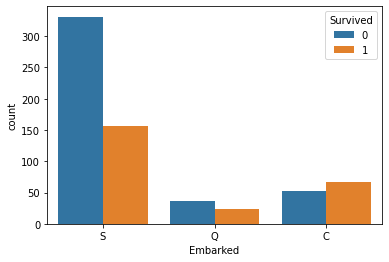

In [413]:
sns.countplot(data=data_train_discrete, x="Embarked", hue="Survived")

Respecto a este gráfico,  podemos comentar que en S la mayoría muere, en Q mueren aproximadamente las mismas personas que sobreviven y en C sobreviven más personas que mueren.

Así pues, la varible Embarked nos puede ser útil en nuestro modelo.

In [414]:
data_train_discrete["Cabin"]=data_train_discrete["Cabin"].str[0]
data_train_discrete

,Name,Sex,Ticket,Cabin,Embarked,Survived
PassengerId,,,,,,
36,"Holverson, Mr. Alexander Oskar",male,113789,NaN,S,0
47,"Lennon, Mr. Denis",male,370371,NaN,Q,0
454,"Goldenberg, Mr. Samuel L",male,17453,C,C,1
292,"Bishop, Mrs. Dickinson H (Helen Walton)",female,11967,B,C,1
749,"Marvin, Mr. Daniel Warner",male,113773,D,S,0
...,...,...,...,...,...,...
716,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,348124,F,S,0
768,"Mangan, Miss. Mary",female,364850,NaN,Q,0
73,"Hood, Mr. Ambrose Jr",male,S.O.C. 14879,NaN,S,0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

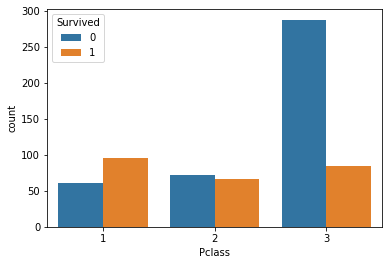

In [415]:
sns.countplot(data=data_train_continuous, x="Pclass", hue="Survived")

En este gráfico hemos hecho distinción por género.

Podemos comprobar que si el pasajero tiene sexo femenino y ha embarcado en S, sobrevive.

Con esto podemos concluir que tanto la variable "Embarked" como "Sex" tienen un poder discriminativo considerable así que debemos de tenerlas en cuenta en nuestro modelo.

En este gráfico, tal como hemos visto anteriormente, un pasajero de clase baja tiene muchas más posibilidades de morir.

Por otro lado, sobrevive la mayoría de los pasajeros de primera clase.

Con todo esto vemos claramente que la variable "Pclass" nos va a ser útil en nuestro modelo

Si su sexo es "female" y ha embarcado en S ha sobrevivido

<AxesSubplot:xlabel='Embarked', ylabel='Sex'>

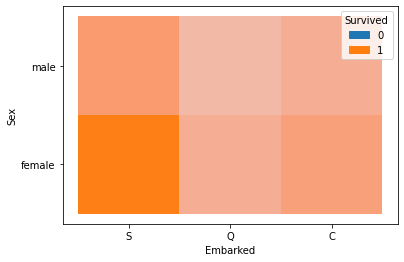

In [416]:
sns.histplot(data_train_discrete, x="Embarked", y="Sex", hue="Survived")


En este gráfico vemos claramente que si el pasajero tiene sexo "female" y ha embarcado en S sobrevive.

Esto nos indica que tanto la variable "Embarked" como "Sex" debemos considerarlas en nuestro modelo

<AxesSubplot:xlabel='Sex', ylabel='Count'>

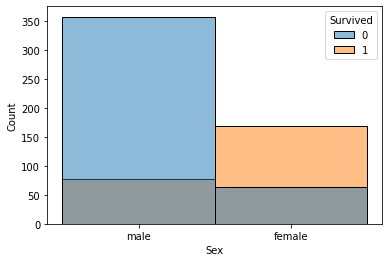

In [417]:
sns.histplot(data_train_discrete, x="Sex", hue="Survived")

También hemos considerado realizar un estudio de la variable "Sex" por si sola ya que hemos visto anteriormente que tenía bastante poder discriminativo.

Tal como podemos ver, el número de hombres que muere es mayor que el de mujeres. De hecho, por cada hombre que muere, sobreviven aproximadamente, dos mujeres.

Esto coincide con lo que se hacía en el barco 

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

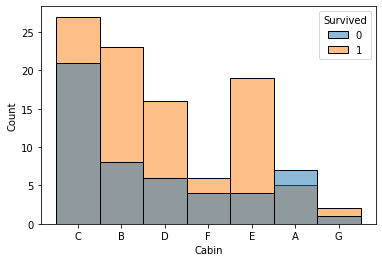

In [418]:
sns.histplot(data_train_discrete, x="Cabin", hue="Survived")

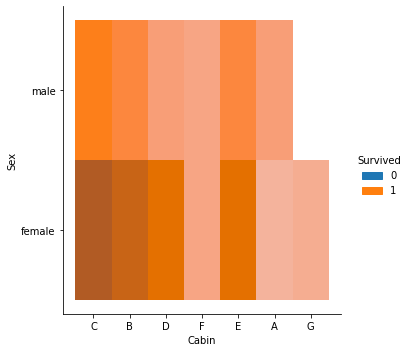

In [419]:
sns.displot(data_train_discrete, x="Cabin", y="Sex", hue="Survived")

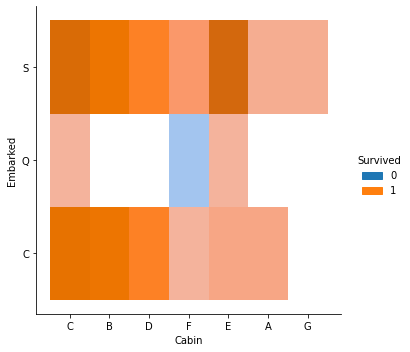

In [420]:
sns.displot(data_train_discrete, x="Cabin", y="Embarked", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

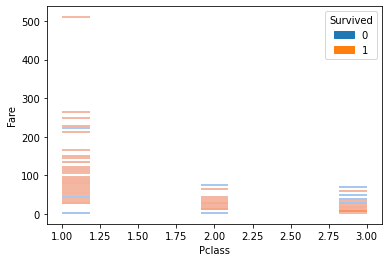

In [421]:
sns.histplot(data_train_continuous, x="Pclass", y="Fare", hue="Survived")

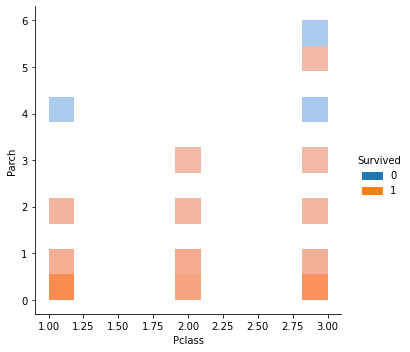

In [422]:
sns.displot(data_train_continuous, x="Pclass", y="Parch", hue="Survived")

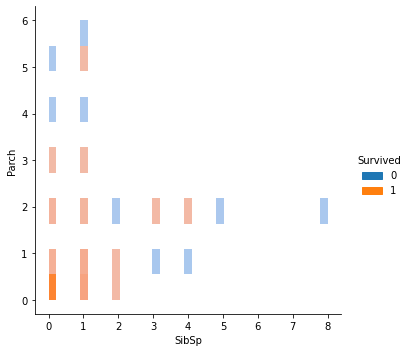

In [423]:
sns.displot(data_train_continuous, x="SibSp", y="Parch", hue="Survived")

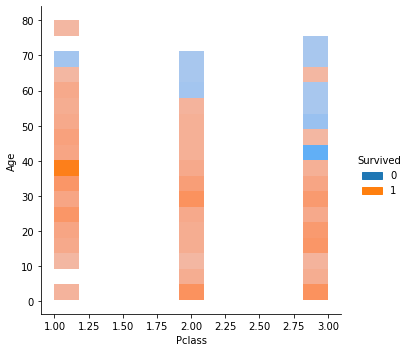

In [424]:
sns.displot(data_train_continuous, x="Pclass", y="Age", hue="Survived")

In [425]:
# data["Pclass"].where(data["Pclass"]!=1,"alta",inplace=True)
# data["Pclass"].where(data["Pclass"]!=2,"media",inplace=True)
# data["Pclass"].where(data["Pclass"]!=3,"baja",inplace=True)

In [426]:
arguments = {"labels": target, "axis": "columns"}
X = data.drop(**arguments)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
arguments = {"labels": ["Fare","Parch","Age","SibSp"], "axis": "columns"}
X_train_discrete = X_train.drop(**arguments)
data_train_discrete = pd.concat([X_train_discrete,y_train],axis=1)

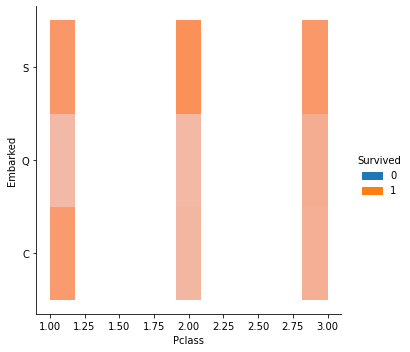

In [427]:
sns.displot(data_train_discrete, x="Pclass", y="Embarked", hue="Survived")

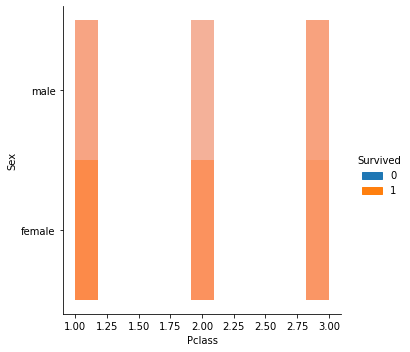

In [428]:
sns.displot(data_train_discrete, x="Pclass", y="Sex", hue="Survived")

## 2. Preprocesamiento de los datos

Para continuar, vamos a realizar un preprocesamiento de los datos en función de los estudios realizados anteriormente. 


                    

In [429]:
from sklearn.compose import make_column_transformer
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, OneHotEncoder, FunctionTransformer

## Imputar media o moda segun categoricos o numericos

In [430]:
numeric_categories = ["Age","Fare"]
categoric_categories = ["Embarked", "Sex", "Pclass"]

In [431]:

imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), [3,7]),
    (SimpleImputer(strategy="most_frequent"), [0,2,9]),
    remainder="passthrough"
    
)

 ## Normalizador

In [432]:
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), [3,7]),
    remainder="passthrough"
)

In [433]:
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),[0,2,9]),
    remainder="passthrough"
)

## Función para Cabin 

In [434]:
funcion  = FunctionTransformer(X["Cabin"].str[0])

## Discretizador

In [435]:
parameters = {"strategy": "most_frequent"}

In [436]:
dummy = estimators["DummyClassifier"]

In [437]:
dummy = dummy(**parameters)

In [438]:
parameters = {"n_bins": 3, "strategy": "uniform"}

In [439]:
discretizer = estimators["KBinsDiscretizer"]

In [440]:
discretizer = discretizer(**parameters)

## Algoritmos de clasificación

In [441]:
parameters = {"random_state": seed}

In [442]:
tree = estimators["DecisionTreeClassifier"]

In [443]:
tree = tree(**parameters)

 ## Creación del PipeLine

In [444]:
preprocessing = make_pipeline(imputer, normalizer, encoder, funcion)

In [445]:
def print_feature_indexes(preprocessing, X):
    """Print the index of the features after each step."""
    # Copy the original dataframe to not modify it
    X_copy = X.copy()

    for index, step in enumerate(preprocessing):
        # Fit the transformer to the modified dataframe
        step.fit(X_copy) 

        # Get the name of the features after training the transformer
        feature_names = [name.split("__")[-1] for name in step.str()]

        # Create the new dataframe with the features provided by the transformer 
        X_copy = pd.DataFrame(step.transform(X_copy), columns=feature_names)

        print(f"After step {index + 1}, the index of the features are: {list(enumerate(feature_names))}")

In [446]:
print_feature_indexes(preprocessing, X)

AttributeError: AttributeError: 'ColumnTransformer' object has no attribute 'str'

In [82]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
36,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
47,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
454,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
749,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
...,...,...,...,...,...,...,...,...,...,...
716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
768,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
73,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S


## Resultados

In [83]:
from sklearn.metrics import classification_report

In [84]:
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



In [85]:
evaluate = lambda estimator, X_train, y_train: estimator.fit(X_train, y_train).score(X_train, y_train)

In [86]:
#evaluate(dummy,X_test, y_test)

In [87]:
#evaluate(tree, X_test, y_test)

In [450]:
evaluate(preprocessing, X_train, y_train)

ValueError: ValueError: could not convert string to float: 'male'

In [ ]:
# preprocessing = make_pipeline(imputer, normalizer, encoder, funcion)
# print_feature_indexes(preprocessing, X)

In [688]:
# numeric_features = ["Age","Parch","Fare"]
# numeric_transformer = make_pipeline(
#     steps=[["imputer", SimpleImputer(strategy="mean")], ("scaler", StandardScaler())]
# )

# categorical_features = ["Embarked", "Cabin", "Sex", "Pclass"]
# categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("cat", categorical_transformer, categorical_features)
#     ],remainder='drop'
# )

In [689]:
# pipe = make_pipeline(
#     steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
# )
# X["Cabin"] = X["Cabin"].str[0]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# pipe.fit(X_train, y_train)
# print("model score: %.3f" % pipe.score(X_test, y_test))